In [1]:
import pandas as pd
import seaborn as sn
from sklearn.linear_model import LogisticRegression

In [2]:
Bank=pd.read_csv('C:\\Users\\91741\\Downloads\\bank-full.csv',sep=';')

In [5]:
Bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
Bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
# select columns
columns=['age','balance','duration','campaign','y']
Bankdata=Bank[columns]
Bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.6+ MB


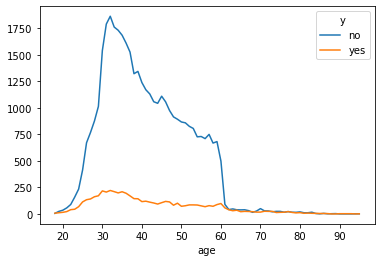

In [10]:
pd.crosstab(Bankdata.age,Bankdata.y).plot(kind='line')

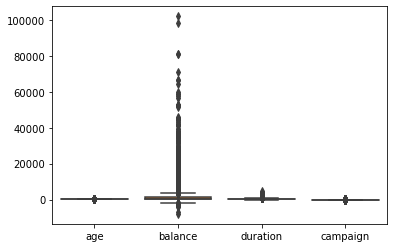

In [12]:
sn.boxplot(data=Bankdata,orient='v')

In [13]:
Bankdata['outcome']=Bankdata.y.map({'no':0,'yes':1})
Bankdata.tail(10)

<ipython-input-13-3726065438f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bankdata['outcome']=Bankdata.y.map({'no':0,'yes':1})


,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,1
45202,34,557,224,1,yes,1
45203,23,113,266,1,yes,1
45204,73,2850,300,1,yes,1
45205,25,505,386,2,yes,1
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


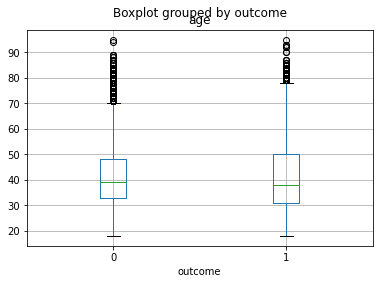

In [14]:
Bankdata.boxplot(column='age',by='outcome')

In [ ]:
#probably not a great feature since lot of outliers

In [16]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = Bankdata[feature_col]
Y = Bankdata[output_target]

In [17]:
classifier=LogisticRegression()

In [18]:
classifier.fit(X,Y)

C:\Users\91741\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [19]:
classifier.coef_

array([[ 7.69721572e-03,  3.72191063e-05,  3.54908898e-03,
        -1.39828306e-01]])

In [20]:
classifier.predict_proba(X)

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553763, 0.69446237],
       [0.82336233, 0.17663767],
       [0.86407825, 0.13592175]])

In [21]:
y_pred=classifier.predict(X)

In [22]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix = confusion_matrix(Y,y_pred)

In [26]:
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


Text(0.5, 15.0, 'Predicted Label')

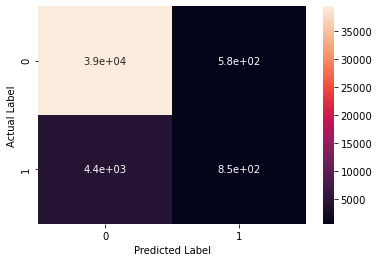

In [28]:
import matplotlib.pyplot as plt
sn.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')